In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import statistics
import re

In [5]:
%cd /media/miri-o/Documents/
import biovec
CDR3_cropped_model = biovec.models.load_protvec('trained_models/CDR3_model_Celiac_based_20180506.txt')

/media/miri-o/Documents


In [6]:
infile = pd.read_csv('CDR3_properties_HCV.csv')
infile.head()

,Unnamed: 0,X,Unnamed..0,index,Unnamed..0.1,SEQUENCE_ID,SEQUENCE_INPUT,FUNCTIONAL,IN_FRAME,STOP,...,VJL,CDR3_AA_LENGTH,CDR3_AA_GRAVY,CDR3_AA_BULK,CDR3_AA_ALIPHATIC,CDR3_AA_POLARITY,CDR3_AA_CHARGE,CDR3_AA_BASIC,CDR3_AA_ACIDIC,CDR3_AA_AROMATIC
0,1,0,0,0,0,AACTGTAAGATACACTA,GCTTTCTGAGAGTCATGGATCTCATGTGCAAGAAAATGAAGCACCT...,True,True,False,...,IGHV4-39*IGHJ4*39,11,-0.554545,13.468182,0.445455,8.163636,-0.077262,0.090909,0.090909,0.181818
1,2,1,1,1,1,CTTATAGTCATTAAATA,AGCTCTGGGAGAGGAGCCCAGCACTAGAAGTCGGCGGTGTTTCCAT...,True,True,False,...,IGHV3-30*IGHJ4*48,14,-1.771429,10.337143,0.071429,10.078571,-2.888734,0.142857,0.285714,0.142857
2,3,3,3,3,3,TGCCTTGGCCCTTATTT,GAGATCTCAGAGAGGAGCCTTAGCCCTGGACTCCAAGGCCTTTCCA...,True,True,False,...,IGHV3-11*IGHJ2*36,10,-0.680000,15.822000,0.490000,8.520000,-0.001375,0.200000,0.200000,0.300000
3,4,4,4,5,5,GATATTCGATATATAAT,AGCTCTGAGAGAGGAGCCCAGCCCTGGGATTTTCAGGTGTTTTCAT...,True,True,False,...,IGHV3-23*IGHJ4*57,17,-0.764706,13.157059,0.458824,8.676471,-0.005748,0.117647,0.117647,0.235294
4,5,5,5,6,6,CTAATAAATCGTTATTA,GAGCTCTCAGAGAGGTGCCTTAGCCCTGGATTCCAAGGCATTTCCA...,True,True,False,...,IGHV3-48*IGHJ4*54,16,-0.868750,14.255625,0.368750,8.506250,0.993936,0.125000,0.062500,0.250000


In [36]:
infile['CONDITION'] = [re.split('\d', condition)[0] for condition in infile['SUBJECT']]
conditions = infile['CONDITION'].unique()
#infile['JUNC_AA'] = [word[2:-1] for word in infile['JUNC_AA']]
#t = [word[2:-1] for word in infile['JUNC_AA']]
#t


pandas.core.series.Series

In [48]:
cropper = lambda x: str(x)[2:-1]
infile['JUNC_AA'] = infile['JUNC_AA'].apply(cropper)

In [50]:
import random
n = 50000
np.random.seed(1)
random_indexes = {}
random_indexes = random_indexes.fromkeys(conditions,0)
for condition in conditions:
    indexes = np.where(infile['CONDITION']==condition)[0]
    random_indexes[condition] = np.random.choice(indexes,n)
    


In [57]:
import random
n = 50000
np.random.seed(0)
random_indexes = np.random.choice(len(infile['CONDITION']),n)

In [58]:
# Make a new data frame with the smapled data
subdata = {'Original_index':random_indexes, 
           'JUNC_AA' : infile['JUNC_AA'][random_indexes], 
           'CONDITION': infile['CONDITION'][random_indexes],
          'SUBJECT':infile['SUBJECT'][random_indexes]}


In [59]:
CDR3_cropped_model.to_vecs(infile['JUNC_AA'][subdata['Original_index'][1]])

[array([ 0.27014291, -0.15508153,  0.2913152 , -0.05035588, -0.43983921,
        -0.21051441,  0.4408516 ,  0.42425939,  0.91557002,  0.39393836,
         0.09484311,  0.08476115, -0.00721247, -0.42077005,  1.03904259,
        -0.64721036,  0.57490385, -0.63048613, -0.86650103, -0.61944336,
        -0.70327604, -0.05217281, -0.04885701, -0.67872208,  0.33656496,
        -0.24568883,  0.49212003, -0.50698805, -0.46536553,  0.47140971,
         0.92476606, -0.11774284, -0.89919871, -0.49446893,  0.16818531,
        -0.07530548, -0.54770088,  0.50137019,  0.07077341, -0.05163154,
         0.41537952,  0.25134689, -0.67207438,  0.54211926, -0.67597759,
        -0.61421412,  0.04978709, -1.0156852 , -0.21227923,  0.33542129,
         0.11400507, -0.47426862, -0.15635088, -0.00347308,  0.04810824,
        -0.40743056,  0.35799706, -0.25637481, -0.50399029,  0.22926208,
        -0.18170279, -0.37264052,  0.62904608,  0.29898101,  0.25548247,
         0.59933716, -0.12029693, -0.44591114,  0.6

In [82]:
randvectors_word2vec = np.zeros((n,100))
to_drop = []
index = 0
for i in range(n) :
    word = subdata['JUNC_AA'].iloc[i]
    try:
        randvectors_word2vec[i] = list(CDR3_cropped_model.to_vecs(word)[0])
    except:
        try:
            subdata['Original_index'][i] = np.random.choice(len(infile['CONDITION']))
            subdata['JUNC_AA'].iloc[i]  = infile['JUNC_AA'][subdata['Original_index'][i]]
            subdata['CONDITION'].iloc[i] = infile['CONDITION'][subdata['Original_index'][i]]
            word = subdata['JUNC_AA'].iloc[i]
            randvectors_word2vec[i] = list(CDR3_cropped_model.to_vecs(word)[0])
        except:
            randvectors_word2vec[i] = np.nan
            to_drop = to_drop.append(i)
            print(str(i) + 'index not valid')
    


to_drop

[]

In [80]:
len(randvectors_word2vec)

50000

In [83]:
#randvectors_word2vec[0]
vec_embedded = TSNE(n_components=2, init = 'pca', random_state =0).fit_transform(randvectors_word2vec)

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa


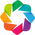

In [86]:
import holoviews as hv
hv.extension('bokeh')

In [84]:
subdata['dim1'] = vec_embedded[:,0]
subdata['dim2'] = vec_embedded[:,1]


In [85]:
pd.DataFrame(subdata).to_csv('TSNE_results_150k.csv', index=False)

In [87]:
scatter = hv.Scatter(subdata, 'dim1', 'dim2')
scatter

:Scatter   [dim1]   (dim2)

In [90]:
points = hv.Points((subdata['dim1'], subdata['dim2']))
import datashader as ds
from holoviews.operation.datashader import aggregate, shade, datashade, dynspread
from holoviews.operation import decimate
datashade(points) + dynspread(datashade(points))

RuntimeError: module compiled against API version 0xb but this version of numpy is 0xa

ImportError: numpy.core.multiarray failed to import

In [94]:

from bokeh.io import output_file, output_notebook, show
from bokeh.models import HoverTool
from bokeh.plotting import figure

p = figure(title="Hexbin for 50k points", match_aspect=True,
           tools="wheel_zoom,reset", background_fill_color='#440154')
p.grid.visible = False

r, bins = p.hexbin(subdata['dim1'], subdata['dim2'], size=3, hover_color="pink", hover_alpha=0.8)

#p.circle(subdata['dim1'], subdata['dim2'], color="white", size=1)

hover = HoverTool(tooltips=[("count", "@c"), ("(q,r)", "(@q, @r)")],
                  mode="mouse", point_policy="follow_mouse", renderers=[r])

p.add_tools(hover)



show(p)
